Needed Libraries 

In [1]:
import category_encoders as ce
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error ,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import math


data reading

In [2]:
df=pd.read_csv("VideoGamesSales.csv")
X = df.iloc[:, :-1]
print(X)

                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales

Studying&understanding the dataset nature

In [3]:
print (df.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [4]:
df.shape

(16719, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Data Preparing & cleaning

In [6]:
df.drop(columns=['Year_of_Release', 'Developer', 'Publisher', 'Platform'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16717 non-null  object 
 1   Genre         16717 non-null  object 
 2   NA_Sales      16719 non-null  float64
 3   EU_Sales      16719 non-null  float64
 4   JP_Sales      16719 non-null  float64
 5   Other_Sales   16719 non-null  float64
 6   Global_Sales  16719 non-null  float64
 7   Critic_Score  8137 non-null   float64
 8   Critic_Count  8137 non-null   float64
 9   User_Score    10015 non-null  object 
 10  User_Count    7590 non-null   float64
 11  Rating        9950 non-null   object 
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


In [8]:
df.isnull()

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
16714,False,False,False,False,False,False,False,True,True,True,True,True
16715,False,False,False,False,False,False,False,True,True,True,True,True
16716,False,False,False,False,False,False,False,True,True,True,True,True
16717,False,False,False,False,False,False,False,True,True,True,True,True


Hannding the numeric columns 

In [9]:
numeric_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count']

In [10]:
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\I-SEVEN\AppData\Local\Temp\ipykernel_13032\3348978680.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [11]:
for column in numeric_columns:
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.median(df[column]), df[column])

Hannding non numeric columns

In [12]:
non_numeric_columns=['Genre','Rating','User_Score']
for col in non_numeric_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\I-SEVEN\AppData\Local\Temp\ipykernel_13032\3897063461.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [13]:
df["Genre"].unique()
df["Genre"].value_counts()

Genre
Action          3372
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

In [14]:
df["Rating"].unique()
df["Rating"].value_counts()

Rating
E       10760
T        2961
M        1563
E10+     1420
EC          8
K-A         3
RP          3
AO          1
Name: count, dtype: int64

In [15]:
df["User_Score"].unique()
df["User_Score"].value_counts()

User_Score
tbd    9129
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1         2
0.9       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [16]:
df.drop('User_Score', axis=1, inplace=True)


In [17]:
print('Feature name || Total missing values')
print(df.isna().sum())

Feature name || Total missing values
Name            2
Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Critic_Score    0
Critic_Count    0
User_Count      0
Rating          0
dtype: int64


In [18]:
df.reset_index(inplace=True , drop= True)

In [19]:
X = df.drop(columns=['Global_Sales', 'Name'])
y = df['Global_Sales']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True
)

print("Train-Test Split:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

Train-Test Split:
X_train: (13375, 9), X_test: (3344, 9)
y_train: (13375,), y_test: (3344,)


In [21]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)
print("\nK-Fold Splits:")
for fold, (train_index, test_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}:")
    print(f"  Train indices: {train_index[:10]}... ({len(train_index)} total)")
    print(f"  Test indices: {test_index[:10]}... ({len(test_index)} total)")


K-Fold Splits:
Fold 1:
  Train indices: [ 0  1  2  3  4  5  6  7  9 10]... (11145 total)
  Test indices: [ 8 14 19 31 33 35 36 39 41 47]... (2230 total)
Fold 2:
  Train indices: [ 1  2  4  5  6  7  8  9 11 12]... (11146 total)
  Test indices: [ 0  3 10 17 23 29 32 37 42 43]... (2229 total)
Fold 3:
  Train indices: [0 1 2 3 4 5 6 7 8 9]... (11146 total)
  Test indices: [12 20 30 48 57 58 65 69 81 84]... (2229 total)
Fold 4:
  Train indices: [0 1 2 3 4 5 6 7 8 9]... (11146 total)
  Test indices: [15 26 27 28 34 44 51 52 53 66]... (2229 total)
Fold 5:
  Train indices: [ 0  1  3  4  5  8  9 10 12 13]... (11146 total)
  Test indices: [ 2  6  7 11 16 18 22 24 25 40]... (2229 total)
Fold 6:
  Train indices: [ 0  2  3  6  7  8 10 11 12 14]... (11146 total)
  Test indices: [ 1  4  5  9 13 21 38 54 55 60]... (2229 total)


In [22]:
X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]
print(f"  X_train_fold: {X_train_fold.shape}, X_val_fold: {X_val_fold.shape}")
print(f"  y_train_fold: {y_train_fold.shape}, y_val_fold: {y_val_fold.shape}")

  X_train_fold: (11146, 9), X_val_fold: (2229, 9)
  y_train_fold: (11146,), y_val_fold: (2229,)


In [23]:
encoder = ce.OneHotEncoder(cols=["Genre", "Rating"], use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


c:\Users\I-SEVEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


In [24]:
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

c:\Users\I-SEVEN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


In [25]:
print("Encoded X_train shape:", X_train_encoded.shape)
print("Encoded X_test shape:", X_test_encoded.shape)

Encoded X_train shape: (13375, 26)
Encoded X_test shape: (3344, 26)


In [26]:
X_train_encoded

,Genre_Sports,Genre_Misc,Genre_Strategy,Genre_Fighting,Genre_Adventure,Genre_Puzzle,Genre_Racing,Genre_Action,Genre_Role-Playing,Genre_Shooter,...,Critic_Score,Critic_Count,User_Count,Rating_E,Rating_T,Rating_E10+,Rating_M,Rating_EC,Rating_K-A,Rating_RP
9162,1,0,0,0,0,0,0,0,0,0,...,68.967679,26.360821,162.229908,1,0,0,0,0,0,0
8300,0,1,0,0,0,0,0,0,0,0,...,68.967679,26.360821,162.229908,1,0,0,0,0,0,0
6518,0,0,1,0,0,0,0,0,0,0,...,68.967679,26.360821,162.229908,1,0,0,0,0,0,0
3307,0,0,0,1,0,0,0,0,0,0,...,68.967679,26.000000,77.000000,0,1,0,0,0,0,0
12933,0,0,0,0,1,0,0,0,0,0,...,68.967679,26.360821,162.229908,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,0,0,0,0,0,0,0,0,0,...,68.967679,26.360821,162.229908,1,0,0,0,0,0,0
11964,0,0,0,0,0,0,0,0,1,0,...,68.967679,26.360821,63.000000,0,1,0,0,0,0,0
5390,0,1,0,0,0,0,0,0,0,0,...,68.967679,26.360821,13.000000,1,0,0,0,0,0,0
860,1,0,0,0,0,0,0,0,0,0,...,68.967679,26.360821,82.000000,0,1,0,0,0,0,0


In [27]:
print(X_train_encoded.head())

       Genre_Sports  Genre_Misc  Genre_Strategy  Genre_Fighting  \
9162              1           0               0               0   
8300              0           1               0               0   
6518              0           0               1               0   
3307              0           0               0               1   
12933             0           0               0               0   

       Genre_Adventure  Genre_Puzzle  Genre_Racing  Genre_Action  \
9162                 0             0             0             0   
8300                 0             0             0             0   
6518                 0             0             0             0   
3307                 0             0             0             0   
12933                1             0             0             0   

       Genre_Role-Playing  Genre_Shooter  ...  Critic_Score  Critic_Count  \
9162                    0              0  ...     68.967679     26.360821   
8300                    0         

In [28]:
scaler = StandardScaler()

In [29]:
numeric_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Count']

In [30]:
X_train_scaled = scaler.fit_transform(X_train_encoded[numeric_columns])
X_test_scaled = scaler.transform(X_test_encoded[numeric_columns])

In [31]:
X_train_final = pd.DataFrame(X_train_scaled, columns=numeric_columns)
X_train_final = pd.concat([X_train_final, X_train_encoded.drop(columns=numeric_columns).reset_index(drop=True)], axis=1)
X_test_final = pd.DataFrame(X_test_scaled, columns=numeric_columns)
X_test_final = pd.concat([X_test_final, X_test_encoded.drop(columns=numeric_columns).reset_index(drop=True)], axis=1)

In [32]:
print("X_train_final shape:", X_train_final.shape)
print("X_test_final shape:", X_test_final.shape)
print(X_train_final.head())

X_train_final shape: (13375, 26)
X_test_final shape: (3344, 26)
   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Critic_Score  Critic_Count  \
0  0.163452 -0.675196 -0.430237    -0.170975     -0.110553      0.238180   
1 -0.820525  0.682709  3.393615    -0.170975     -0.110553      0.238180   
2 -0.820525 -0.675196 -0.430237    -0.769770     -0.110553      0.238180   
3  1.223120  2.380091  3.871596     3.421790     -0.110553      0.084588   
4 -0.442072 -0.675196 -0.430237    -0.170975     -0.110553      0.238180   

   User_Count  Genre_Sports  Genre_Misc  Genre_Strategy  ...  Genre_Shooter  \
0    0.670656             1           0               0  ...              0   
1    0.670656             0           1               0  ...              0   
2    0.670656             0           0               1  ...              0   
3   -0.541916             0           0               0  ...              0   
4    0.670656             0           0               0  ...              0   

   G

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_final)
X_test = scaler.transform(X_test_final)

In [34]:
X_train_final

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Genre_Sports,Genre_Misc,Genre_Strategy,...,Genre_Shooter,Genre_Simulation,Genre_Platform,Rating_E,Rating_T,Rating_E10+,Rating_M,Rating_EC,Rating_K-A,Rating_RP
0,0.163452,-0.675196,-0.430237,-0.170975,-0.110553,0.238180,0.670656,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.820525,0.682709,3.393615,-0.170975,-0.110553,0.238180,0.670656,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.820525,-0.675196,-0.430237,-0.769770,-0.110553,0.238180,0.670656,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1.223120,2.380091,3.871596,3.421790,-0.110553,0.084588,-0.541916,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.442072,-0.675196,-0.430237,-0.170975,-0.110553,0.238180,0.670656,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13370,-0.215001,-0.675196,-0.430237,-0.170975,-0.110553,0.238180,0.670656,0,0,0,...,0,1,0,1,0,0,0,0,0,0
13371,-0.593454,-0.675196,1.003708,-0.170975,-0.110553,0.238180,-0.741095,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13372,1.071739,0.173495,-0.430237,1.625407,-0.110553,0.238180,-1.452449,0,1,0,...,0,0,0,1,0,0,0,0,0,0
13373,-0.215001,-0.335720,-0.430237,-0.170975,-0.110553,0.238180,-0.470781,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
X_test_final

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Genre_Sports,Genre_Misc,Genre_Strategy,...,Genre_Shooter,Genre_Simulation,Genre_Platform,Rating_E,Rating_T,Rating_E10+,Rating_M,Rating_EC,Rating_K-A,Rating_RP
0,0.466214,0.173495,-0.430237,-0.170975,-0.110553,0.23818,-1.324406,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.820525,-0.675196,0.047745,-0.769770,-0.110553,0.23818,0.670656,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.139310,-0.335720,-0.430237,-0.170975,-0.110553,0.23818,-1.480903,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-0.290691,-0.505458,-0.430237,-0.170975,-0.110553,0.23818,0.670656,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,0.314833,-0.675196,-0.430237,-0.170975,-0.110553,0.23818,0.670656,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,-0.215001,2.210353,-0.430237,0.427819,-0.110553,0.23818,-1.210589,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3340,-0.215001,0.173495,-0.430237,1.026613,-0.110553,0.23818,0.670656,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3341,-0.517763,-0.165982,-0.430237,-0.170975,-0.110553,0.23818,0.670656,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3342,-0.744835,-0.675196,-0.430237,-0.769770,-0.110553,0.23818,-1.523585,0,0,0,...,0,0,0,1,0,0,0,0,0,0


===============================


===========================================

==============================================

1. Linear Regression

In [36]:
lin_reg_model = LinearRegression()

In [37]:
lin_reg_model.fit(X_train_final, y_train)

LinearRegression()

In [38]:
lin_reg_cv = cross_val_score(lin_reg_model, X_train_final, y_train, cv=kf, scoring="neg_mean_squared_error")
lin_reg_mse = -lin_reg_cv


In [39]:
print("Linear Regression MSE (Cross-Validation):", lin_reg_mse)
mean_lin_reg_mse = np.mean(lin_reg_mse)  
print("Mean MSE across folds:", mean_lin_reg_mse)

Linear Regression MSE (Cross-Validation): [0.02689624 0.02507568 0.02597534 0.02562097 0.02687113 0.0254554 ]
Mean MSE across folds: 0.02598245871433039


In [40]:
lin_reg_rmse = np.sqrt(lin_reg_mse)  
print("Linear Regression RMSE (Cross-Validation):", lin_reg_rmse)

Linear Regression RMSE (Cross-Validation): [0.16400074 0.15835301 0.16116866 0.16006551 0.16392416 0.15954749]


In [41]:
cross_val_r2 = cross_val_score(lin_reg_model, X_train_final, y_train, cv=kf, scoring="r2")
print("Cross-validation R²:", cross_val_r2)
mean_cross_val_r2 = np.mean(cross_val_r2)
print("Mean R² across folds:", mean_cross_val_r2)

Cross-validation R²: [0.48552781 0.51647493 0.51512105 0.51833348 0.48611934 0.49497989]
Mean R² across folds: 0.5027594144327402


In [42]:
rmse_mean = np.mean(lin_reg_rmse)  
print(f"Mean RMSE from cross-validation: {rmse_mean}")

Mean RMSE from cross-validation: 0.16117659373918145


In [43]:
train_score = lin_reg_model.score(X_train_final, y_train)
print(f"Training R²: {train_score}")

Training R²: 0.504932067120371


In [44]:
y_pred = lin_reg_model.predict(X_test_final)

In [45]:
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")
rmse = np.sqrt(mse)  
print(f"Test RMSE: {rmse}")

Test MSE: 0.02532477418065079
Test RMSE: 0.1591375951202317


In [46]:
test_score = lin_reg_model.score(X_test_final, y_test)
print(f"Test R²: {test_score}")

Test R²: 0.5015510819305609


In [47]:
error_score = r2_score(y_test, y_pred)
print("R² from predicted values: ", error_score)

R² from predicted values:  0.5015510819305609


In [48]:
mae_lin = mean_absolute_error(y_test, y_pred)
print(mae_lin)

0.09437113501036265


In [49]:
lin_reg_model.score(X_test_final,y_pred)

1.0

In [50]:
mean_lin_reg_mse = mean_squared_error(y_test, y_pred)
mean_lin_reg_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
lin_reg_mae = mean_absolute_error(y_test, y_pred)
r2_lin_reg_mse= r2_score(y_test, y_pred)
print(f"Linear- MSE: {mean_lin_reg_mse},RMSE: {mean_lin_reg_rmse},MAE: {lin_reg_mae}, R²: {r2_lin_reg_mse}") 

Linear- MSE: 0.02532477418065079,RMSE: 0.1591375951202317,MAE: 0.09437113501036265, R²: 0.5015510819305609


2. K-Nearest Neighbors (KNN)

Define Hyperprameters 

In [51]:
neighbors = np.arange(1, 26)
rmse_values =[]
for neighbor in neighbors:
    knn = KNeighborsRegressor(n_neighbors = neighbor)
    knn.fit(X_train_final,y_train)
    y_pred = knn.predict(X_test_final)
    mse_knn = mean_squared_error(y_test, y_pred)
    K_rmse=K_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(K_rmse)

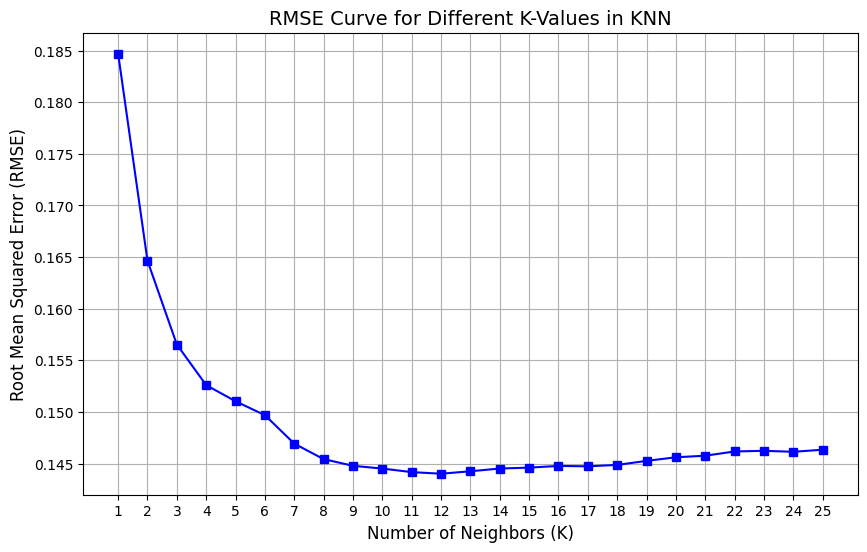

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors, rmse_values, marker='s', color='blue', linestyle='-', markersize=6)
plt.title("RMSE Curve for Different K-Values in KNN", fontsize=14)
plt.xlabel("Number of Neighbors (K)", fontsize=12)
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
plt.xticks(neighbors)
plt.grid(True)
plt.show()

In [53]:
optimal_k = neighbors[np.argmin(rmse_values)]
print(f"Optimal K value: {optimal_k}")

Optimal K value: 12


In [54]:
knn_optimized = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimized.fit(X_train_final, y_train)

KNeighborsRegressor(n_neighbors=np.int64(12))

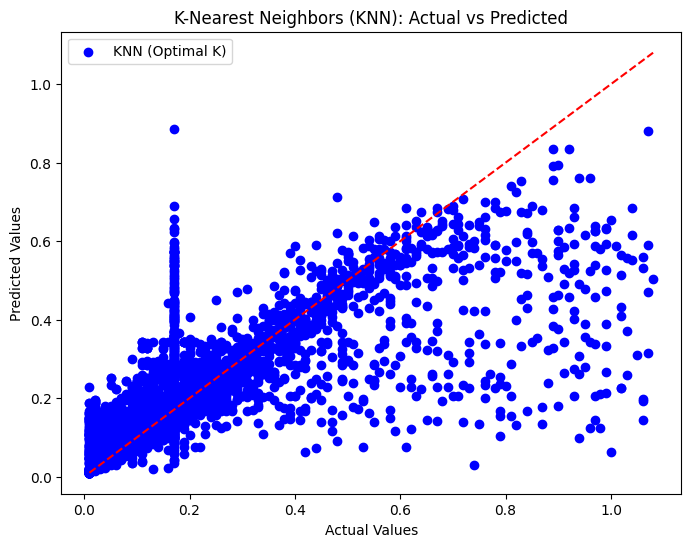

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='KNN (Optimal K)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('K-Nearest Neighbors (KNN): Actual vs Predicted')
plt.legend()
plt.show()

In [56]:
train_score_knn = knn_optimized.score(X_train_final, y_train)
print(f"Training R² Score with KNN: {train_score:.3f}")

Training R² Score with KNN: 0.505


In [57]:
y_pred_knn = knn_optimized.predict(X_test_final)

In [58]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
K_rmse=K_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN - MSE: {mse_knn},RMSE: {K_rmse},MAE: {mae_knn}, R²: {r2_knn}")

KNN - MSE: 0.0207409209280303,RMSE: 0.14634182652744074,MAE: 0.07434833532695374, R²: 0.5917716966558625


visualization&performence

In [59]:
models = ['Linear Regression', 'KNN (Optimal K)'] 
mse_values_all = [mean_lin_reg_mse, mse_knn]
print(mse_values_all)

[0.02532477418065079, 0.0207409209280303]


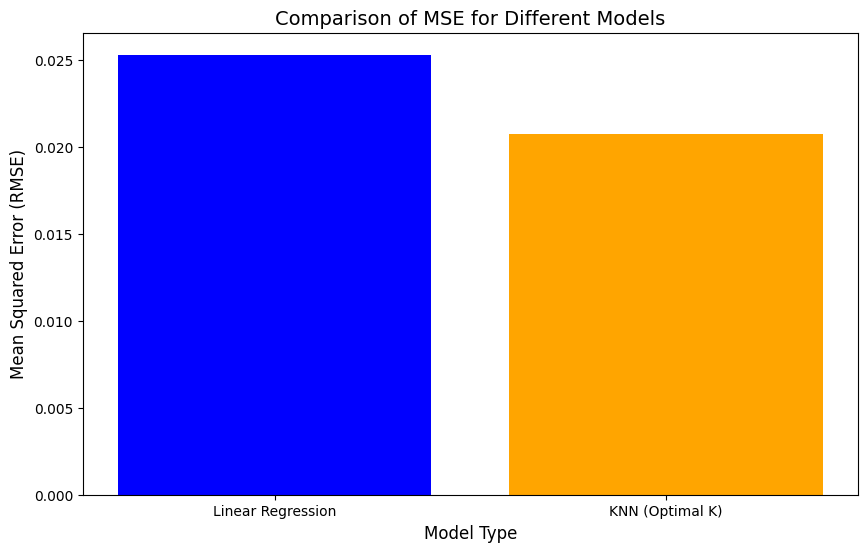

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values_all, color=['blue', 'orange'])
plt.xlabel('Model Type', fontsize=12)
plt.ylabel('Mean Squared Error (RMSE)', fontsize=12) 
plt.title('Comparison of MSE for Different Models', fontsize=14) 
plt.show()

===========================================================================

In [61]:
models = ['Linear Regression', 'KNN (Optimal K)'] 
rmse_values_all = [rmse_mean, K_rmse]
print(rmse_values_all)

[np.float64(0.16117659373918145), 0.14634182652744074]


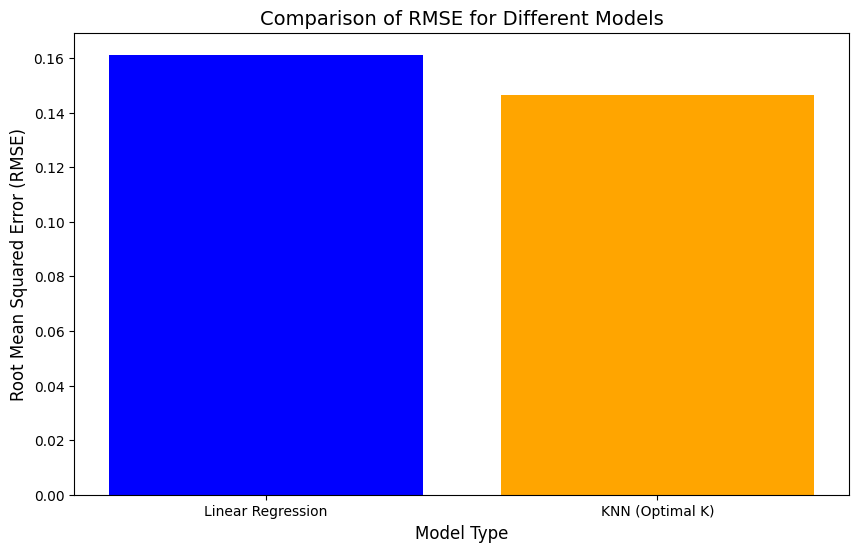

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values_all, color=['blue', 'orange'])
plt.xlabel('Model Type', fontsize=12)
plt.ylabel('Root Mean Squared Error (RMSE)', fontsize=12) 
plt.title('Comparison of RMSE for Different Models', fontsize=14) 
plt.show()

=======================================================================================

In [63]:
models = ['Linear Regression', 'KNN (Optimal K)'] 
abs_scores_all = [mae_lin, mae_knn ]
print(abs_scores_all)

[0.09437113501036265, 0.07434833532695374]


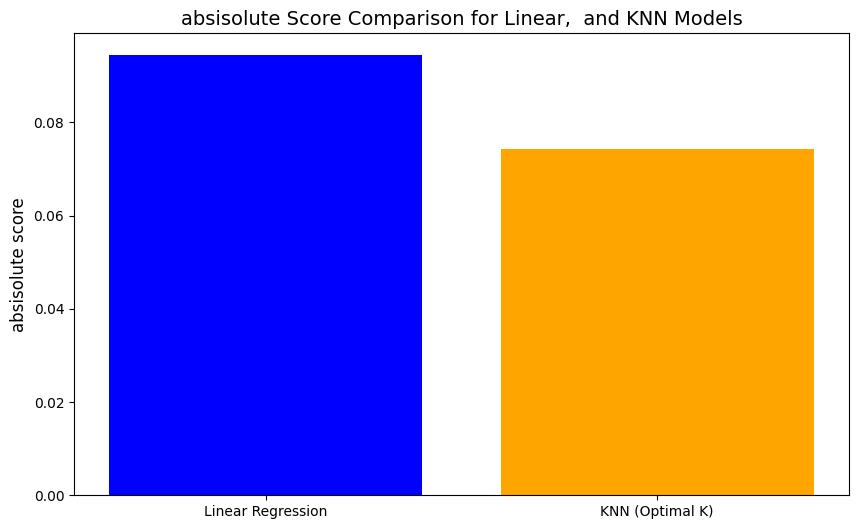

In [64]:
plt.figure(figsize=(10, 6)) 
plt.bar(models, abs_scores_all, color=['blue', 'orange', ])
plt.ylabel('absisolute score', fontsize=12) 
plt.title('absisolute Score Comparison for Linear,  and KNN Models', fontsize=14) 
plt.show()

=============================================================

In [65]:
models = ['Linear Regression', 'KNN (Optimal K)'] 
r2_scores_all = [test_score, r2_knn]
print(r2_scores_all)

[0.5015510819305609, 0.5917716966558625]


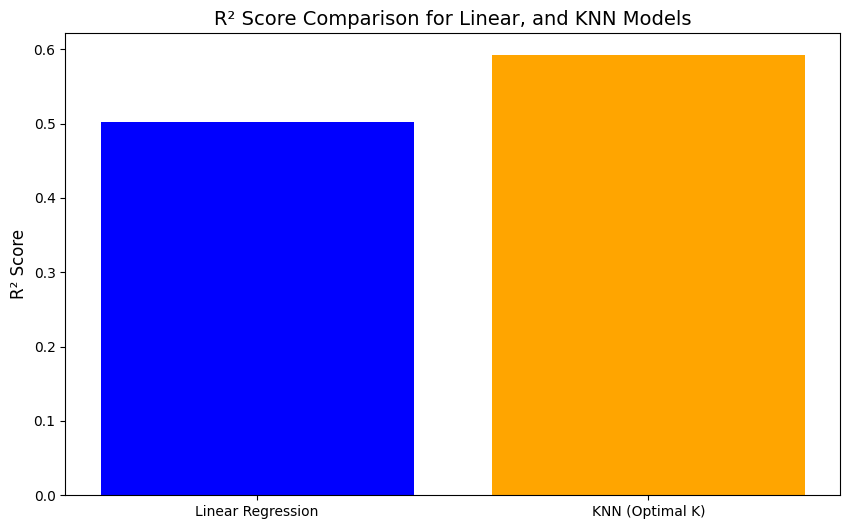

In [66]:
plt.figure(figsize=(10, 6)) 
plt.bar(models, r2_scores_all, color=['blue', 'orange',])
plt.ylabel('R² Score', fontsize=12) 
plt.title('R² Score Comparison for Linear, and KNN Models', fontsize=14) 
plt.show()

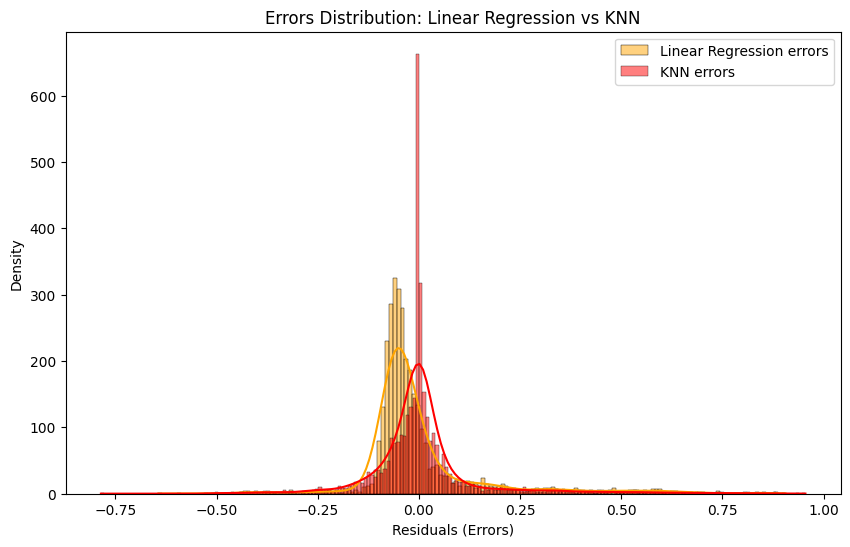

In [67]:
lr_pred = lin_reg_model.predict(X_test_final)
lr_errors = y_test - lr_pred
knn_pred = knn_optimized.predict(X_test_final)
knn_residuals = y_test - knn_pred
plt.figure(figsize=(10, 6))
sns.histplot(lr_errors, kde=True, color='orange', label='Linear Regression errors')
sns.histplot(knn_residuals, kde=True, color='red', label='KNN errors')
plt.xlabel('Residuals (Errors)')
plt.ylabel('Density')
plt.title('Errors Distribution: Linear Regression vs KNN')
plt.legend()
plt.show()


In [68]:
mean_lin_reg_mse = mean_squared_error(y_test, y_pred)
mean_lin_reg_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
lin_reg_mae = mean_absolute_error(y_test, y_pred)
r2_lin_reg_mse= r2_score(y_test, y_pred)
print(f"Linear- MSE: {mean_lin_reg_mse},RMSE: {mean_lin_reg_rmse},MAE: {lin_reg_mae}, R²: {r2_lin_reg_mse}") 

Linear- MSE: 0.02141593019138756,RMSE: 0.14634182652744074,MAE: 0.07700490430622009, R²: 0.5784859854148776


In [69]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
K_rmse=K_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN - MSE: {mse_knn},RMSE: {K_rmse},MAE: {mae_knn}, R²: {r2_knn}")

KNN - MSE: 0.0207409209280303,RMSE: 0.14634182652744074,MAE: 0.07434833532695374, R²: 0.5917716966558625
